# The Double Pendulum Problem
## Using Sympy to get the equations of motion

The goal of this notebook will be to animate solutions to the double pendulum problem. Derivations of the equations of motion of the double pendulum will be performed with the assistance of Sympy.

The double pendulum will consist of two connected rods, with a mass attached to the end of each rod. The x and y positions of the masses in the global coordinate system are:

$$x_1\  =\  l_{1}sin\theta_{1} $$
$$x_{2}\  =\  l_{1}sin\theta_{1} \  +\  l_{2}sin\theta_{2} $$
$$y_{1}\  =\  -l_{1}cos\theta_{1} $$
$$y_{2}\  =\  -l_{1}cos\theta_{1} \  -\  l_{2}cos\theta_{2} $$

The potential and kinetic energies of the system are:

$$PE\  =\  m_{1}gy_{1}\  +\  m_{2}gy_{2}$$
$$KE\  =\  \frac{1}{2} m_{1}v^{2}_{1}\  +\  \frac{1}{2} m_{2}v^{2}_{2}$$

We will use the assistance of Sympy to obtain these equations. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sympy
from IPython.display import HTML

In [2]:
#conda install ffmpeg

In [3]:
m1, m2, g, l1, l2, t = sympy.symbols('m1 m2 g l1 l2 t', positive=True, real=True)

In [4]:
theta1 = sympy.Function('theta1')(t)
theta2 = sympy.Function('theta2')(t)

In [5]:
x1 = l1*sympy.sin(theta1)
x2 = l1*sympy.sin(theta1) + l2*sympy.sin(theta2)
y1 = -l1*sympy.cos(theta1)
y2 = -l1*sympy.cos(theta1) - l2*sympy.cos(theta2)

In [6]:
# Define the velocities
x1_dot = x1.diff(t)
y1_dot = y1.diff(t)
x2_dot = x2.diff(t)
y2_dot = y2.diff(t)
sympy.simplify(y2_dot)

l1*sin(theta1(t))*Derivative(theta1(t), t) + l2*sin(theta2(t))*Derivative(theta2(t), t)

In [7]:
PE = m1*g*y1 + m2*g*y2
KE = 0.5*m1*(x1_dot**2 + y1_dot**2) + 0.5*m2*(x2_dot**2 + y2_dot**2)
sympy.simplify(KE)

0.5*l1**2*m1*Derivative(theta1(t), t)**2 + 0.5*m2*(l1**2*Derivative(theta1(t), t)**2 + 2*l1*l2*cos(theta1(t) - theta2(t))*Derivative(theta1(t), t)*Derivative(theta2(t), t) + l2**2*Derivative(theta2(t), t)**2)

We will use the Lagrangian in order to determine the equations of motion for the pendulum. The lagrangian is defined as:

$$L = KE - PE$$

To get to the equations of motion in terms of the desired states $\theta_1$ and $\theta_2$, we use the following operations:

$$\frac{\partial L}{\partial \theta } -\frac{\partial }{\partial t} \left( \frac{\partial L}{\partial \dot{\theta } } \right)  = 0$$

for both $\theta_1$ and $\theta_2$.

The strategy will be to establish the Lagrangian equations, and then eliminate the second derivative for the other state variable in each equation.

In [8]:
L = KE - PE
theta1dot = theta1.diff(t)
theta2dot = theta2.diff(t)
dLdth1dot = L.diff(theta1dot)
dLdt = dLdth1dot.diff(t)
dLdth1 = L.diff(theta1)

In [9]:
eq1 = sympy.Eq(dLdth1 - dLdt, 0)

In [10]:
sympy.simplify(eq1)

Eq(1.0*l1*(g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)) + l1*m1*Derivative(theta1(t), (t, 2)) + l1*m2*Derivative(theta1(t), (t, 2)) + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2 + l2*m2*cos(theta1(t) - theta2(t))*Derivative(theta2(t), (t, 2))), 0)

This is the equation of motion for the $\theta_1$ state. Note that it contains the second derivative of the other state variable. Therefore, we will use the equation of motion for $theta_2$ to solve for $theta_2$, substitute this into the equation for $\ddot{\theta }_{1} $.

In [11]:
dLdth2dot = L.diff(theta2dot)
dLdt2 = dLdth2dot.diff(t)
dLdth2 = L.diff(theta2)
eq2 = sympy.Eq(dLdth2 - dLdt2, 0)

In [12]:
theta2dotdot = sympy.solve(eq2, theta2.diff(t).diff(t), dict=True)
theta2dotdot

[{Derivative(theta2(t), (t, 2)): (-g*sin(theta2(t)) + l1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2 - l1*cos(theta1(t) - theta2(t))*Derivative(theta1(t), (t, 2)))/l2}]

The result is a list containing a dictionary. We will use this to make the substitution back into eq1.

In [13]:
eq1_subs = eq1.subs(*theta2dotdot)

In [14]:
sympy.simplify(eq1_subs)

Eq(1.0*l1*(-g*m1*sin(theta1(t)) - g*m2*sin(theta1(t) - 2*theta2(t))/2 - g*m2*sin(theta1(t))/2 - l1*m1*Derivative(theta1(t), (t, 2)) - l1*m2*sin(2*theta1(t) - 2*theta2(t))*Derivative(theta1(t), t)**2/2 + l1*m2*cos(2*theta1(t) - 2*theta2(t))*Derivative(theta1(t), (t, 2))/2 - l1*m2*Derivative(theta1(t), (t, 2))/2 - l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2), 0)

We can see that this equation does not contain any instances of the second derivative of $\theta_2$.

In [15]:
theta1dotdot = sympy.solve(eq1_subs, theta1.diff(t).diff(t))
theta1dotdot

[-(2.0*g*m1*sin(theta1(t)) + g*m2*sin(theta1(t) - 2.0*theta2(t)) + g*m2*sin(theta1(t)) + l1*m2*sin(2.0*theta1(t) - 2.0*theta2(t))*Derivative(theta1(t), t)**2 + 2.0*l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)/(l1*(2.0*m1 - m2*cos(2.0*theta1(t) - 2.0*theta2(t)) + m2))]

In [16]:
th1dotdot = theta1dotdot[0]

In [17]:
th1dotdot

-(2.0*g*m1*sin(theta1(t)) + g*m2*sin(theta1(t) - 2.0*theta2(t)) + g*m2*sin(theta1(t)) + l1*m2*sin(2.0*theta1(t) - 2.0*theta2(t))*Derivative(theta1(t), t)**2 + 2.0*l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)/(l1*(2.0*m1 - m2*cos(2.0*theta1(t) - 2.0*theta2(t)) + m2))

We now have exactly what we want to be able to solve this expression using a Runge-Kutta algorithm, which is the second derivative of the state variable in terms of the state variables and first derivatives of the state variables.

We will now use our newly-found expression for the second derivative of $\theta_1$ to solve for $\ddot{\theta }_{2} $

In [18]:
eq2_subs = eq2.subs(theta1.diff(t).diff(t), th1dotdot)

In [19]:
eq2_subs

Eq(-g*l2*m2*sin(theta2(t)) + 0.5*m2*(2*l2*(l1*sin(theta1(t))*Derivative(theta1(t), t) + l2*sin(theta2(t))*Derivative(theta2(t), t))*cos(theta2(t))*Derivative(theta2(t), t) - 2*l2*(l1*cos(theta1(t))*Derivative(theta1(t), t) + l2*cos(theta2(t))*Derivative(theta2(t), t))*sin(theta2(t))*Derivative(theta2(t), t)) - 0.5*m2*(2*l2*(l1*sin(theta1(t))*Derivative(theta1(t), t) + l2*sin(theta2(t))*Derivative(theta2(t), t))*cos(theta2(t))*Derivative(theta2(t), t) - 2*l2*(l1*cos(theta1(t))*Derivative(theta1(t), t) + l2*cos(theta2(t))*Derivative(theta2(t), t))*sin(theta2(t))*Derivative(theta2(t), t) + 2*l2*(-l1*sin(theta1(t))*Derivative(theta1(t), t)**2 - l2*sin(theta2(t))*Derivative(theta2(t), t)**2 + l2*cos(theta2(t))*Derivative(theta2(t), (t, 2)) - (2.0*g*m1*sin(theta1(t)) + g*m2*sin(theta1(t) - 2.0*theta2(t)) + g*m2*sin(theta1(t)) + l1*m2*sin(2.0*theta1(t) - 2.0*theta2(t))*Derivative(theta1(t), t)**2 + 2.0*l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)*cos(theta1(t))/(2.0*m1 - m2*c

The expression is a long one, but it does not contain $\ddot{\theta }_{1} $, which is what we want.

In [20]:
theta2dotdot = sympy.solve(eq2_subs, theta2.diff(t).diff(t))

In [21]:
th2dotdot = theta2dotdot[0]

In [22]:
th2dotdot

(g*m1*sin(2.0*theta1(t) - theta2(t)) - g*m1*sin(theta2(t)) + g*m2*sin(2.0*theta1(t) - theta2(t)) - g*m2*sin(theta2(t)) + 2.0*l1*m1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2 + 2.0*l1*m2*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2 + l2*m2*sin(2.0*theta1(t) - 2.0*theta2(t))*Derivative(theta2(t), t)**2)/(l2*(2.0*m1 - m2*cos(2.0*theta1(t) - 2.0*theta2(t)) + m2))

We now have both second derivative expressions, and can begin setting up the numerical solution.

## Numerical Solution

In [23]:
class RK4:
    '''
    Class for performing 4th-order Runge-Kutta integrations
    
    Init Parameters
    ---------------
    derivatives: function or class instance.
    '''
    def __init__(self, derivatives, params):
        self.derivatives = derivatives
        self.params = params
    
    def _integrate(self, state, t):
        dt = params['dt']
        k1 = self.derivatives(state, t, self.params)
        k2 = self.derivatives(state+k1*dt/2, t+dt/2, self.params)
        k3 = self.derivatives(state+k2*dt/2, t+dt/2, self.params)
        k4 = self.derivatives(state+k3*dt, t+dt, self.params)
        
        k = (k1 + 2*k2 + 2*k3 + k4)/6
        return state + k*dt
    
    def __call__(self, state, t):
        new_state = self._integrate(state, t)
        return new_state

In [25]:
class Derivatives:
    ''' Derivative class for use in the Runge-Kutta algorithm'''
    def __init__(self):
        pass
    
    def _derivs(self, state, t, params):
        l1, l2, m1, m2, g = params['l1'], params['l2'], params['m1'], params['m2'], params['g']
        theta1, omega1, theta2, omega2 = state[0], state[1], state[2], state[3]
        
        # compute theta1 angular acceleration
        den1 = l1*(2*m1 - m2*np.cos(2*theta1 - 2*theta2) + m2)
        num1 = 2*g*m1*np.sin(theta1) + g*m2*np.sin(theta1 - 2*theta2) + g*m2*np.sin(theta1) + \
        l1*m2*np.sin(2*theta1 - 2*theta2)*omega1**2 + 2*l2*m2*np.sin(theta1 - theta2)*omega2**2
        th1_acc = -num1/den1
        
        # compute theta2 angular acceleration
        den2 = l2*(2*m1 - m2*np.cos(2*theta1 - 2*theta2) + m2)
        num2 = g*m1*np.sin(2*theta1 - theta2) - g*m1*np.sin(theta2) + g*m2*np.sin(2*theta1 - theta2) - \
        g*m2*np.sin(theta2) + 2*l1*m1*np.sin(theta1 - theta2)*omega1**2 + \
        + 2*l1*m2*np.sin(theta1-theta2)*omega1**2 + l2*m2*np.sin(2*theta1 - 2*theta2)*omega2**2
        th2_acc = num2/den2
        
        return np.array([omega1, th1_acc, omega2, th2_acc])
    
    def __call__(self, state, t, params):
        state_deriv = self._derivs(state, t, params)
        return state_deriv

In [33]:
class Pendulum:
    def __init__(self, nt, initial_state, params):
        self.params = params
        self.nt = nt
        self.initial_state = initial_state
        self.state = np.zeros((nt, 4))
        self.state[0,:] = initial_state
        
    def get_position(self):
        self.x_pos = np.zeros((self.nt,3))
        self.y_pos = np.zeros((self.nt,3))
        self.x_pos[:,1] = self.params['l1']*np.sin(self.state[:,0])
        self.x_pos[:,2] = self.params['l1']*np.sin(self.state[:,0]) + params['l2']*np.sin(self.state[:,2])
        self.y_pos[:,1] = -self.params['l1']*np.cos(self.state[:,0])
        self.y_pos[:,2] = -self.params['l1']*np.cos(self.state[:,0]) - params['l2']*np.cos(self.state[:,2])
        return self.x_pos, self.y_pos
    
    def get_energy(self):
        v1 = np.zeros((self.nt,2))
        v2 = np.zeros((self.nt,2))
        v1[:,0] = self.params['l1']*self.state[:,1]*np.cos(self.state[:,0])
        v1[:,1] = self.params['l1']*self.state[:,1]*np.sin(self.state[:,0])
        v2[:,0] = self.params['l1']*self.state[:,1]*np.cos(self.state[:,0]) + \
        self.params['l2']*self.state[:,3]*np.cos(self.state[:,2])
        v2[:,1] = self.params['l1']*self.state[:,1]*np.sin(self.state[:,0]) + \
        self.params['l2']*self.state[:,3]*np.sin(self.state[:,2])
        
        self.energy = np.zeros(self.nt)
        pe = self.params['m1']*self.params['g']*self.y_pos[:,1] + \
        self.params['m2']*self.params['g']*self.y_pos[:,2]
        ke = 0.5*self.params['m1']*(v1[:,0]**2 + v1[:,1]**2) + \
        0.5*self.params['m2']*(v2[:,0]**2 + v2[:,1]**2)
        self.energy = ke + pe
        return self.energy
        
    def get_state(self, i):
        return self.state[i]
    
    def get_state_array(self):
        return self.state
    
    def update_state(self, new_state, i):
        self.state[i] = new_state   

In [63]:
# parameters dictionary
params = {'l1':1.0,'l2':1.0,'m1':1.0,'m2':1.0,'g':9.81,'dt':0.01}
# Initial state, theta1 omega1 theta2 omega2
state1 = np.array([235, 0, 0, 0])*np.pi/180
state2 = np.array([235, 0, 0+1e-2, 0])*np.pi/180
tf = 10
nt = int(tf/params['dt'])
t = np.zeros(nt)

In [64]:
pendulum1 = Pendulum(nt, state1, params)
pendulum2 = Pendulum(nt, state2, params)
derivs = Derivatives()
rk4 = RK4(derivs, params)
for i in range(nt-1):
    state_old1 = pendulum1.get_state(i)
    state_old2 = pendulum2.get_state(i)
    state_new1 = rk4(state_old1, t[i])
    state_new2 = rk4(state_old2, t[i])
    pendulum1.update_state(state_new1, i+1)
    pendulum2.update_state(state_new2, i+1)
    t[i+1] = t[i] + params['dt']

In [65]:
xposition_pend1, yposition_pend1 = pendulum1.get_position()
xposition_pend2, yposition_pend2 = pendulum2.get_position()
energy_pend1 = pendulum1.get_energy()
energy_pend2 = pendulum2.get_energy()

In [66]:
xposition_pend1

array([[ 0.        , -0.81915204, -0.81915204],
       [ 0.        , -0.81942778, -0.81915205],
       [ 0.        , -0.82025387, -0.81915212],
       ...,
       [ 0.        , -0.99989241, -1.1153194 ],
       [ 0.        , -0.99977147, -1.16281592],
       [ 0.        , -0.99954278, -1.21011792]])

What we need to do now is convert the angles in the state vector to x and y positions, which we can easily do using our equations from the top. Since we want to draw two lines, we need to have three points for each of x and y.

We will also create a vector to track the total energy of the system, which should remain constant.

# Creating the animation

Now that we have all of the data for our initial conditions, we can set up the animation of the double pendulum.

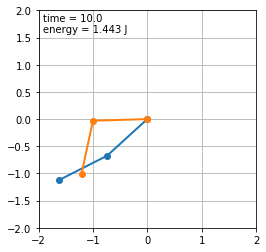

In [67]:
# set up figure and animation
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line1, = ax.plot([], [], 'o-', lw=2)
line2, = ax.plot([], [], 'o-', lw=2) 
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
energy_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)

def init():
    
    '''initialize animation
    This init function inspired by Jake Vanderplas
    '''
    line1.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    energy_text.set_text('')
    return line1, line2, time_text, energy_text

def animate(i):
    line1.set_data(xposition_pend2[i,:], yposition_pend2[i,:])
    line2.set_data(xposition_pend1[i,:], yposition_pend1[i,:])
    time_text.set_text(f'time = {t[i]:.1f}')
    energy_text.set_text(f'energy = {energy_pend1[i]:.3f} J')
    return line1, line2, time_text, energy_text

# choose the interval based on dt and the time to animate one step
# This step also taken from Jake Vanderplas
from time import time
t0 = time()
animate(0)
t1 = time()
interval = 1000 * params['dt'] - (t1 - t0)

ani = FuncAnimation(fig, animate, frames=nt,
                              interval=interval, blit=True, init_func=init)
# ani.save('double_pendulum.mp4', dpi=200,fps=nt/tf)
HTML(ani.to_html5_video())